In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import seaborn as sns
from os.path import isfile
import fiona

In [3]:
fiona.supported_drivers

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'raw',
 'DXF': 'raw',
 'OpenFileGDB': 'r',
 'ESRI Shapefile': 'raw',
 'GeoJSON': 'rw',
 'GPKG': 'rw',
 'GPX': 'raw',
 'GPSTrackMaker': 'raw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'r',
 'SEGY': 'r',
 'SUA': 'r'}

In [4]:
dat = pd.read_pickle('./data/temperature_comparison_area_weighted.pcl')
dat.awR = 1-dat.awR

In [5]:
comparison = 'livneh2idaho'
forcingType = 'tmax'

for comparison in dat.forcingComp.unique():
    for forcingType in ['tmin','tmax']:
        print('%s %s'%(comparison,forcingType))
        df = dat.loc[(dat.forcingType == forcingType) & (dat.forcingComp == comparison)]

        datlists = []

        for datfl,geomfl,awpVal,awRMSE,awMAE,awR in zip(df.dataPath,df.geomPath, df.awpVal, df.awRMSE, df.awMAE, df.awR):
            geom = gpd.read_file(geomfl)
            data = pd.read_pickle(datfl)

            geom['pVal'] = data['pVal']
            geom['RMSE'] = data['RMSE']
            geom['MAE'] = data['MAE']
            geom['R'] = data['R']
            geom['awpVal'] = awpVal
            geom['awRMSE'] = awRMSE
            geom['awMAE'] = awMAE
            geom['awR'] = awR
            
            datlists.append(geom)

        outdat = gpd.GeoDataFrame(pd.concat(datlists, sort=False))
        outdat.reset_index(inplace=True)

        outdat.to_file('./data/%s_%s.gpkg'%(comparison,forcingType))

livneh2idaho tmin
livneh2idaho tmax
daymet2idaho tmin
daymet2idaho tmax
maurer2daymet tmin
maurer2daymet tmax
livneh2maurer tmin
livneh2maurer tmax
maurer2idaho tmin
maurer2idaho tmax
livneh2daymet tmin
livneh2daymet tmax


In [ ]:
del outdat

In [ ]:
del datlists

In [34]:
newGeom = []
for geom in outdat.geometry:
    newGeom.append(geom.simplify(1, preserve_topology=False))

In [35]:
outdat['newGeom'] = newGeom

In [37]:
outdat = outdat.set_geometry(col='newGeom')

KeyboardInterrupt: 

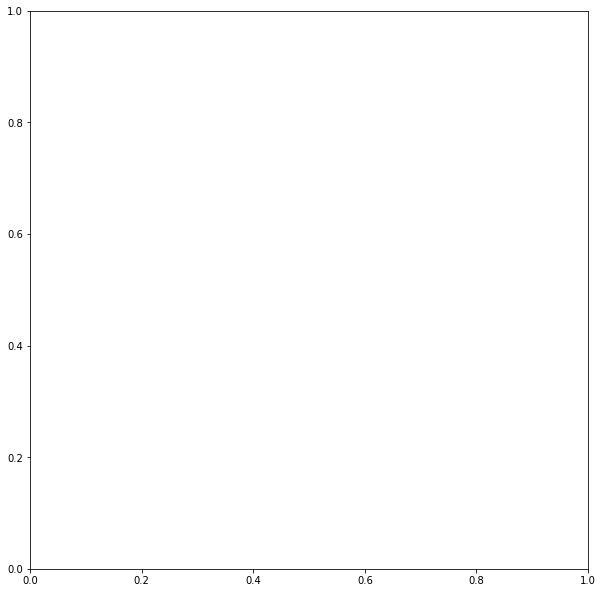

In [42]:
outdat.plot(column = 'awRMSE', figsize = (10,15), cmap = 'Reds')

In [40]:
plt.close()

In [5]:
dat.loc[dat.metric <= 0.05,'metric'] = 1
dat.loc[dat.metric > 0.05,'metric'] = 0

In [9]:
tmp = dat.geometry[19]

In [15]:
tmp.area

6646549.709885274

In [25]:
tmp = datlists[0]

In [26]:
tmp.convex_hull

0       POLYGON ((695335.6190824196 -1486371.290726637...
1       POLYGON ((689582.8605279427 -1487796.12757076,...
2       POLYGON ((695087.6020920845 -1482296.029430258...
3       POLYGON ((694869.1270672621 -1482128.216162439...
4       POLYGON ((717904.2797448545 -1484926.688950782...
5       POLYGON ((683444.8933964907 -1487091.834927149...
6       POLYGON ((720650.348862012 -1483980.583935885,...
7       POLYGON ((720657.4327933204 -1483993.237850501...
8       POLYGON ((694869.5200377872 -1482136.209223855...
9       POLYGON ((697100.8395144796 -1479598.374600665...
10      POLYGON ((698487.564023935 -1479438.619060189,...
11      POLYGON ((720930.6747811554 -1484175.496601394...
12      POLYGON ((681337.6160793528 -1470193.156824, 6...
13      POLYGON ((679878.8546645505 -1478589.861966841...
14      POLYGON ((679441.1437806328 -1470469.223927269...
15      POLYGON ((675011.0379984496 -1477105.300026139...
16      POLYGON ((681383.8234032145 -1469820.10833881,...
17      POLYGO

In [28]:
len(dat.loc[dat.metric==1])

0

In [13]:
tmp.simplify(1, preserve_topology=False).area

6646671.498889604

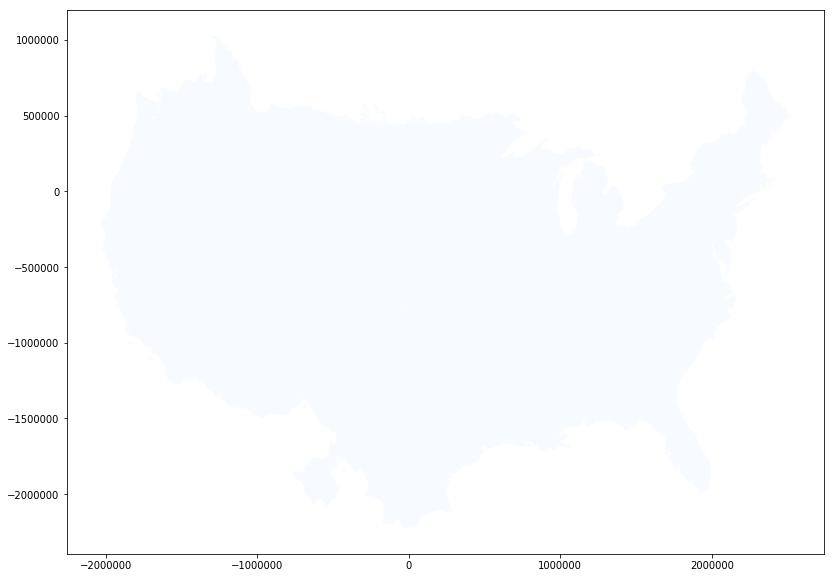

In [27]:
dat.plot(column = 'metric', cmap = 'Blues', figsize=(15,10))

In [19]:
datlists[:-1]

[        POI_ID  hru_id_nat  hru_id_reg region  \
 0     19919206       65883           1     11   
 1     19919206       65884           2     11   
 2     19919250       65885           3     11   
 3     19919250       65886           4     11   
 4     19919294       65887           5     11   
 5     19919358       65888           6     11   
 6     19919294       65889           7     11   
 7     19919292       65890           8     11   
 8     19919358       65891           9     11   
 9     19919248       65892          10     11   
 10    19919248       65893          11     11   
 11    19919292       65894          12     11   
 12    19918344       65895          13     11   
 13    19918358       65896          14     11   
 14    19918358       65897          15     11   
 15    19916764       65898          16     11   
 16    19918344       65899          17     11   
 17    19917920       65900          18     11   
 18    19917014       65901          19     11   


In [26]:
dat = datlists[0]

In [ ]:
dat.append()

In [27]:
for df in datlists[1:]:
    dat = dat.merge(df)

TypeError: unhashable type: 'Polygon'

In [24]:
datlists[0].shape

(7373, 6)

In [25]:
dat.shape

(7373, 6)

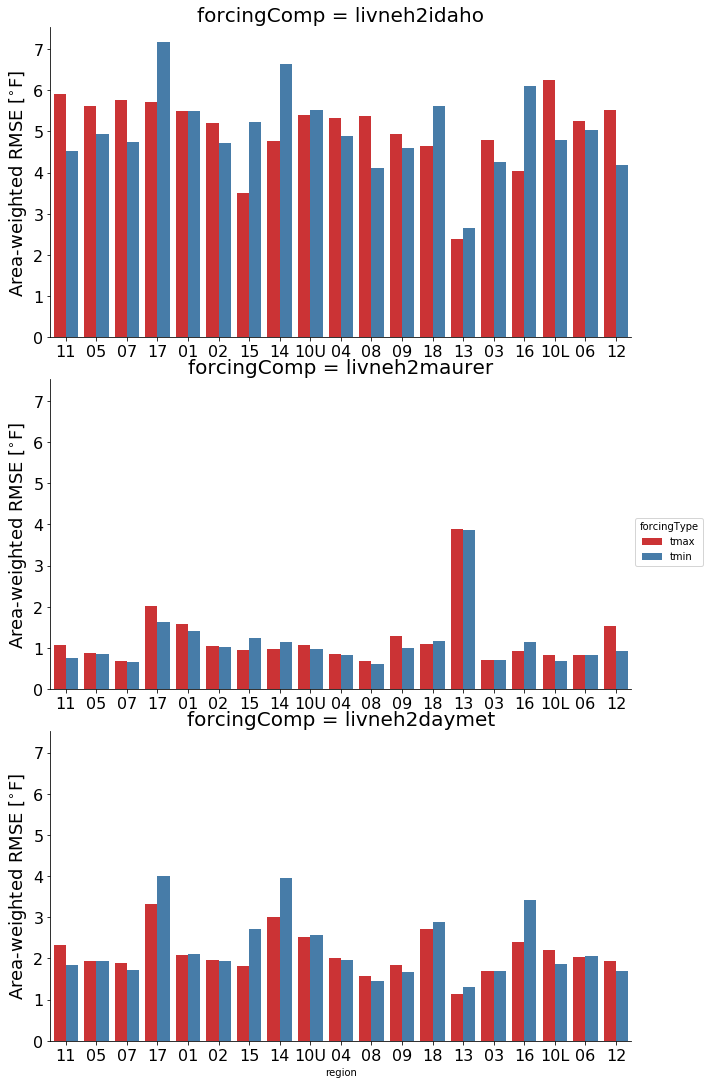

In [14]:
var = 'awRMSE'

g = sns.factorplot(x='region',y=var,hue='forcingType',row='forcingComp',data=dat,kind='bar',
                   aspect=1.75,size=5,sharex=False, palette='Set1')
for s in g.axes:
    s[0].set_ylabel('Area-weighted RMSE [$^{\circ}$F]', fontsize=18)
    title = s[0].get_title()
    s[0].set_title(title,fontsize=20)
    xticks = s[0].get_xticklabels()
    yticks = s[0].get_yticklabels()
    s[0].set_yticklabels(yticks, fontsize = 16)
    s[0].set_xticklabels(xticks, fontsize = 16)

plt.savefig('./figures/TcompAWRMSE.png', bbox_inches = 'tight',dpi = 300)

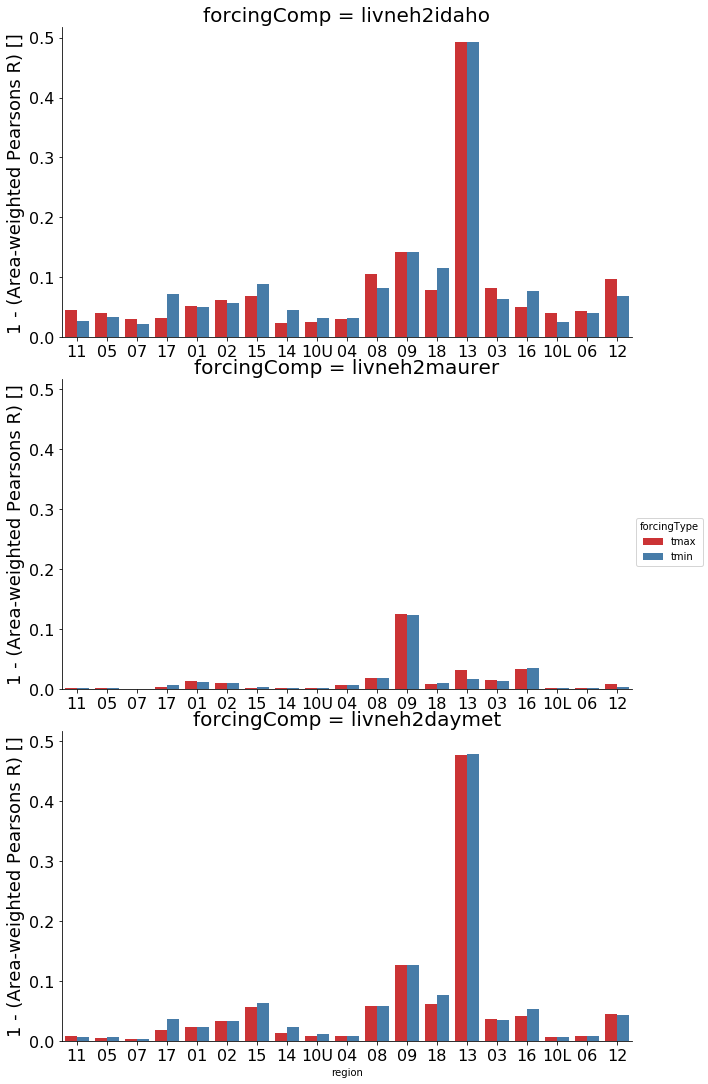

In [15]:
var = 'awR'

g = sns.factorplot(x='region',y=var,hue='forcingType',row='forcingComp',data=dat,kind='bar',
                   aspect=1.75,size=5,sharex=False, palette='Set1')
for s in g.axes:
    s[0].set_ylabel('1 - (Area-weighted Pearsons R) []', fontsize=18)
    title = s[0].get_title()
    s[0].set_title(title,fontsize=20)
    xticks = s[0].get_xticklabels()
    yticks = s[0].get_yticklabels()
    s[0].set_yticklabels(yticks, fontsize = 16)
    s[0].set_xticklabels(xticks, fontsize = 16)
    
plt.savefig('./figures/TcompAWpearsonsR.png', bbox_inches = 'tight',dpi = 300)

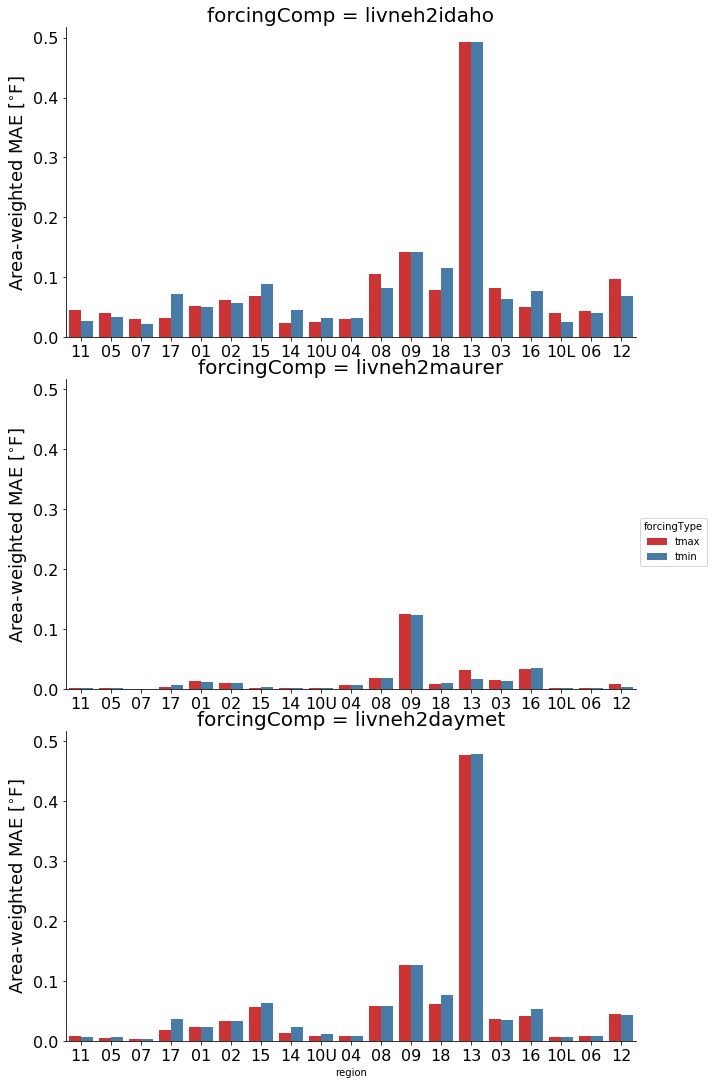

In [16]:
g.var = 'awMAE'

g = sns.factorplot(x='region',y=var,hue='forcingType',row='forcingComp',data=dat,kind='bar',
                   aspect=1.75,size=5,sharex=False, palette='Set1')
for s in g.axes:
    s[0].set_ylabel('Area-weighted MAE [$^{\circ}$F]', fontsize=18)
    title = s[0].get_title()
    s[0].set_title(title,fontsize=20)
    xticks = s[0].get_xticklabels()
    yticks = s[0].get_yticklabels()
    s[0].set_yticklabels(yticks, fontsize = 16)
    s[0].set_xticklabels(xticks, fontsize = 16)

plt.savefig('./figures/TcompAWMAE.png', bbox_inches = 'tight',dpi = 300)

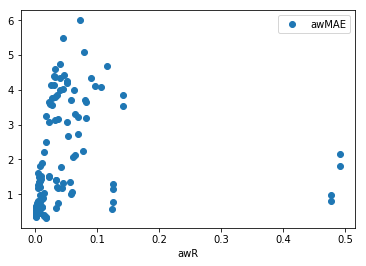

In [14]:
dat.plot(x='awR',y = 'awMAE',marker='o', linewidth = 0)

In [8]:
def plot(df):
    forcingComp = df.forcingComp
    forcingType = df.forcingType
    region = df.region

    fl = dat.loc[(dat.forcingComp==forcingComp) & (dat.forcingType == forcingType) & (dat.region == region)].geomPath.values[0]
    geom = gpd.read_file(fl)
    fl = dat.loc[(dat.forcingComp==forcingComp) & (dat.forcingType == forcingType) & (dat.region == region)].dataPath.values[0]
    data = pd.read_pickle(fl)
    
    var = 'RMSE'
    outfl = './figures/tempComparison/%s_%s_%s.png'%(forcingComp,region,var)
    if isfile(outfl) == 0:
        geom['metric'] = data[var]
        vmin = geom.metric.min()
        vmax = geom.metric.max()
        cmap = 'Reds'
        ax = geom.plot(column = 'metric', figsize=(15,10), vmin=vmin,vmax=vmax, cmap=cmap,linewidth=.1, edgecolor='0.3')
        plt.title('Region: %s, Comparison: %s'%(region,forcingComp), fontsize=16)
        fig = ax.get_figure()
        cax = fig.add_axes([0.91, 0.125, 0.03, 0.75])
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
        # fake up the array of the scalar mappable. Urgh...
        sm._A = []
        cb = fig.colorbar(sm,cax=cax)
        # colorbar with geopandas comes from here: https://stackoverflow.com/questions/36008648/colorbar-on-geopandas
        cb.set_label(label = '%s %s [$^{\circ}$F]'%(forcingType,var), fontsize = 14)
        plt.savefig(outfl, bbox_inches='tight',dpi=300)
        plt.close()
        
    var = 'MAE'
    outfl = './figures/tempComparison/%s_%s_%s.png'%(forcingComp,region,var)
    if isfile(outfl) == 0:
        geom['metric'] = data[var]
        vmin = geom.metric.min()
        vmax = geom.metric.max()
        cmap = 'Reds'
        ax = geom.plot(column = 'metric', figsize=(15,10), vmin=vmin,vmax=vmax, cmap=cmap,linewidth=.1, edgecolor='0.3')
        plt.title('Region: %s, Comparison: %s'%(region,forcingComp), fontsize=16)
        fig = ax.get_figure()
        cax = fig.add_axes([0.91, 0.125, 0.03, 0.75])
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
        # fake up the array of the scalar mappable. Urgh...
        sm._A = []
        cb = fig.colorbar(sm,cax=cax)
        # colorbar with geopandas comes from here: https://stackoverflow.com/questions/36008648/colorbar-on-geopandas
        cb.set_label(label = '%s %s [$^{\circ}$F]'%(forcingType,var), fontsize = 14)
        plt.savefig(outfl, bbox_inches='tight',dpi=300)
        plt.close()
    
    var = 'R'
    outfl = './figures/tempComparison/%s_%s_%s.png'%(forcingComp,region,var)
    if isfile(outfl) == 0:
        geom['metric'] = 1 - data[var]
        vmin = geom.metric.min()
        vmax = geom.metric.max()
        cmap = 'Reds'
        ax = geom.plot(column = 'metric', figsize=(15,10), vmin=vmin,vmax=vmax, cmap=cmap,linewidth=.1, edgecolor='0.3')
        plt.title('Region: %s, Comparison: %s'%(region,forcingComp), fontsize=16)
        fig = ax.get_figure()
        cax = fig.add_axes([0.91, 0.125, 0.03, 0.75])
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
        # fake up the array of the scalar mappable. Urgh...
        sm._A = []
        cb = fig.colorbar(sm,cax=cax)
        # colorbar with geopandas comes from here: https://stackoverflow.com/questions/36008648/colorbar-on-geopandas
        cb.set_label(label = '%s 1-R []'%(forcingType), fontsize = 14)
        plt.savefig(outfl, bbox_inches='tight',dpi=300)
        plt.close()

In [ ]:
dat.apply(plot,axis=1)

/home/tbarnhart/miniconda3/envs/py36/lib/python3.6/site-packages/matplotlib/colors.py:956: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/home/tbarnhart/miniconda3/envs/py36/lib/python3.6/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/home/tbarnhart/miniconda3/envs/py36/lib/python3.6/site-packages/matplotlib/colors.py:956: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/home/tbarnhart/miniconda3/envs/py36/lib/python3.6/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/home/tbarnhart/miniconda3/envs/py36/lib/python3.6/site-packages/matplotlib/colors.py:956: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/home/tbarnhart/miniconda3/envs/py36/lib/python3.6/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/

In [96]:
data.head()

,HRU,r2,MAE,RMSE,NSE,R
0,1,0.926023,4.427166,5.695752,-3.083596e+21,0.966260
1,2,0.918275,4.541953,5.986128,1.016723e+20,0.962543
2,3,0.871782,5.889560,7.550717,-6.773945e+20,0.942537
3,4,0.920280,4.620476,5.935753,-1.717403e+20,0.963798
4,5,0.881460,5.662153,7.300863,-5.960528e+20,0.944898
